In [6]:
!pip install pipreqs

In [7]:
pip install sastrawi

In [8]:
pip install google-play-scraper

In [9]:
pip install wordcloud

In [23]:
# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import nltk

In [24]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
df = pd.read_csv("duolingo_reviews.csv")
df.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,e7892aa4-865e-4529-ac8d-5128df8e36e7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,so far aplikasi nya bagus. minusnya banyak ikl...,3,0,6.25.4,2025-04-13 02:09:04,NaN,NaN,6.25.4
1,e2f54c77-0551-43e5-aab7-60f5cb953713,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,untuk aplikasi nya seruu dan muda untuk di pah...,4,9,6.24.2,2025-04-03 22:46:54,NaN,NaN,6.24.2
2,798d3a62-9737-4161-95ef-d5d14155fcc7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Untuk aplikasi nya sangat bagus, metode pelaja...",1,61,6.22.3,2025-03-29 10:50:52,NaN,NaN,6.22.3
3,d140767b-1c9a-41e6-8612-9b697fbf3e01,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sebelumnya cukup sulit untuk mengumpulkan 5 He...,5,383,6.22.3,2025-03-23 13:31:14,NaN,NaN,6.22.3
4,558f02c7-4fa5-4086-b70d-4513b23bc989,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Duolingo memang baguss polll, aku suka banget....",3,7,6.24.2,2025-04-05 05:42:35,NaN,NaN,6.24.2
5,66d0f78c-3fb0-4a32-bee6-78b60d93afad,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Duolingo sudah mantap sebagai platform yang me...,5,52,6.23.2,2025-04-07 11:45:32,NaN,NaN,6.23.2
6,9877257c-4f1c-4a49-bd9f-32f788873998,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya bagus sekali untuk belajar bahasa....,5,81,6.22.3,2025-04-05 09:47:17,NaN,NaN,6.22.3
7,10b1a687-1c99-455c-8461-fe9d4162e549,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,setelah update kok malah saya masuk quest yang...,3,10,6.23.2,2025-04-01 04:27:48,NaN,NaN,6.23.2
8,9ac569b8-cf27-4ebf-ab32-c2fb60c1221f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,apk nya bagus tapi untuk sekarang saya kasih b...,2,1,6.24.2,2025-04-07 11:24:38,NaN,NaN,6.24.2
9,51b8ff7b-88ff-4285-accc-24db7dff3abb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya bagus untuk belajar bahasa, tapi i...",1,27,6.23.2,2025-03-29 00:21:19,NaN,NaN,6.23.2


In [26]:
# Memilih kolom yang diperlukan
df_reviews = df[['content', 'score']]

In [30]:
# mengubah nama atribute
df = df.rename(columns={'content' : 'ulasan', 'score':'rating'})
# untuk membaca
df.head()

,reviewId,userName,userImage,ulasan,rating,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,e7892aa4-865e-4529-ac8d-5128df8e36e7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,so far aplikasi nya bagus. minusnya banyak ikl...,3,0,6.25.4,2025-04-13 02:09:04,NaN,NaN,6.25.4
1,e2f54c77-0551-43e5-aab7-60f5cb953713,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,untuk aplikasi nya seruu dan muda untuk di pah...,4,9,6.24.2,2025-04-03 22:46:54,NaN,NaN,6.24.2
2,798d3a62-9737-4161-95ef-d5d14155fcc7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Untuk aplikasi nya sangat bagus, metode pelaja...",1,61,6.22.3,2025-03-29 10:50:52,NaN,NaN,6.22.3
3,d140767b-1c9a-41e6-8612-9b697fbf3e01,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sebelumnya cukup sulit untuk mengumpulkan 5 He...,5,383,6.22.3,2025-03-23 13:31:14,NaN,NaN,6.22.3
4,558f02c7-4fa5-4086-b70d-4513b23bc989,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Duolingo memang baguss polll, aku suka banget....",3,7,6.24.2,2025-04-05 05:42:35,NaN,NaN,6.24.2


In [52]:
# Cleaning Text
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Hapus URL
    text = re.sub(r'\@\w+|\#', '', text)  # Hapus mention dan hashtag
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.lower()  # Ubah ke huruf kecil
    return text

In [53]:
# Ganti 'review' dengan nama kolom yang benar jika berbeda
df['cleaned_text'] = df['ulasan'].apply(clean_text)
print(df['clean_text'].head().to_markdown())

|    | clean_text                                                                                                                                                                                                                                                          |
|---:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  1 | aplikasi nya seruu muda paham yaa isi cuore nya sekarang tambah lewat tambah teman tp panggil video pake top up mungkin mudah kalau iklan aja tp sedikit sulit ngomong langsung tp guna panggil mungkin lebih lancar bicara nya                                     |
|  2 | aplikasi nya sangat bagus metode ajar nya tarik jadi aplikasi kurang bagus promosi iklan banding ajar iklan bahkan lebih besar iklan ajar nya iklan laku ajar turun minat tinggal kan duol

In [48]:
def label_sentiment(rating):
    if rating >= 4:
        return "positif"
    elif rating <= 2:
        return "negatif"
    else:
        return "netral"

df["sentiment"] = df["rating"].apply(label_sentiment)
df = df[df["sentiment"] != "netral"]

In [62]:
import nltk
nltk.download('punkt_tab')

# Proses tokenisasi
df['tokens'] = df['cleaned_text'].apply(lambda text: word_tokenize(text) if isinstance(text, str) else [])
print(df['tokens'].head().to_markdown())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


|    | tokens                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
|---:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [64]:
# Stopword Removal dan Custom Stopword
stop_words = set(stopwords.words('indonesian'))
custom_stopwords = {'masuk', 'login'}  # Tambahkan kata kustom
all_stopwords = stop_words.union(custom_stopwords)

df['filtered_tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in all_stopwords])
print(df['filtered_tokens'].head().to_markdown())

|    | filtered_tokens                                                                                                                                                                                                                                                                                                                          |
|---:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  1 | ['aplikasi', 'nya', 'seruu', 'muda', 'pahami', 'yaa', ',', 'pengisian', 'cuore', 'nya', 'ditambah', 'teman', '...', 'tp', 'panggilan', 'video', 'pake', 'top', 'up', '....', 'ya', 'dipermudah', 'iklan', 'ok', 'aja', 'tp', 'sulit', 'ngomong', 'langsung', '.', 'tp', 'panggilan', 'lancar', 'berbicara', 'nya', '.', '😅🙏']

In [66]:
# Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['stemmed'] = df['filtered_tokens'].apply(lambda x: [stemmer.stem(word) for word in x])
print(df['stemmed'].head().to_markdown())

|    | stemmed                                                                                                                                                                                                                                                                                      |
|---:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  1 | ['aplikasi', 'nya', 'seruu', 'muda', 'paham', 'yaa', '', 'isi', 'cuore', 'nya', 'tambah', 'teman', '', 'tp', 'panggil', 'video', 'pake', 'top', 'up', '', 'ya', 'mudah', 'iklan', 'ok', 'aja', 'tp', 'sulit', 'ngomong', 'langsung', '', 'tp', 'panggil', 'lancar', 'bicara', 'nya', '', ''] |
|  2 | ['aplikasi', 'nya', 'bagus', '', 'metode', 'ajar', 'nya', 'tarik', '', 'jadi', 'aplikasi', 'bagus', 'promosi', 

In [79]:
from tqdm import tqdm
tqdm.pandas()

In [80]:
# Kamus slang, dialek, dan singkatan yang akan diubah ke bentuk baku
slang_dialect_dict = {
    'gak': 'tidak',
    'nggak': 'tidak',
    'dng': 'dengan',
    'mantep': 'mantap',
    'mantab': 'mantap',
    'baguss': 'bagus',
    'trs': 'terus',
    'bgt': 'banget',
    'dong': 'sudah',
    'aja': 'saja',
    'kalo': 'kalau',
    'nanya': 'bertanya',
    'nih': 'ini',
    'gini': 'begini',
    'lbh': 'lebih',
    'udh': 'sudah',
    'lumayan': 'cukup',
    'spt': 'seperti',
    'dr': 'dari',
    'jd': 'jadi',
    'ga': 'tidak',
    'dpt': 'dapat',
    'sm': 'sama',
    'btw': 'by the way',
    'gercep': 'gerak cepat',
    'brngnya' : 'barang nya',
    'dgn': 'dengan',
    'pd' : 'pada',
    'gambr' : 'gambar',
    'dtang' : 'datang',
    'peyot' : 'penyok',
    'penyot': 'penyok',
    'bagis': 'bagus',
    'lengkapsafngat': 'lengkap sangat',
    'anakku': 'anak aku',
    'sukaa': 'suka',
    'lengkaptapi' : 'lengkap tapi',
    'diinginkanbarang' : 'diinginkan barang',
    'lengkaphanya':'lengkap hanya',
    'ajadi' : 'jadi',
    'good' :'bagus',
    'yg': 'yang',
    'thx':'terima kasih',
    'makasi':'terima kasih',
    'terimakasih':'terima kasih',
    'peny0k' :'penyok',
    'mantul': 'mantap betul',
    'sukak' : 'suka',


    'ndak': 'tidak',
    'sedek': 'sedikit',
    'capcus': 'cepat pergi',
    'wuenak': 'enak',
    'sampean': 'kamu',
    'ora': 'tidak',
    'makasi': 'terima kasih',
    'sakno': 'kasihan',
    'mangan': 'makan',
    'ngibul': 'bohong',
    'murudul' :'rontok',
    'brudul' :'rontok',
    'brodol' :'rontok',

    'emang': 'memang',
    'kek': 'seperti',
    'pengen': 'ingin',
    'pas': 'ketika',
    'yaudahlah': 'ya sudah lah',
    'beres': 'selesai',
    'seneng' : 'senang',
    'makasih': 'terima kasih',
    'gk tau': 'tidak tahu',
}

def replace_slang_dialect(sentence):
    words = sentence.split()
    replaced_words = [slang_dialect_dict.get(word.lower(), word) for word in words]
    return ' '.join(replaced_words)
df['normalized_ulasan'] = df['ulasan'].progress_apply(replace_slang_dialect)
print(df[['normalized_ulasan']].head(20).to_markdown())
print(df[['normalized_ulasan']].tail(10).to_markdown())

100%|██████████| 69654/69654 [00:00<00:00, 194864.91it/s]

|    | normalized_ulasan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|---:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [85]:
X = df['clean_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [86]:
# Konversi TF-IDF ke DataFrame
X_train_tfidf_dense = X_train_tfidf.toarray()
tfidf_table = pd.DataFrame(X_train_tfidf_dense, columns=tfidf_vectorizer.get_feature_names_out())

# Mengatur opsi tampilan pandas agar tabel terlihat rapi
pd.set_option('display.max_columns', 10)  # Menampilkan maksimum 20 kolom
pd.set_option('display.width', 1000)      # Lebar maksimal tampilan konsol
pd.set_option('display.max_rows', 10)    # Menampilkan maksimum 10 baris
pd.set_option('display.float_format', '{:.1f}'.format)  # Format angka menjadi 1 desimal

# Cetak tabel
print(tfidf_table)

       aa  aaa  aaaa  aaaaa  aaaaaa  ...  yukkk  yunani  yuuu  zaman  zonk
0     0.0  0.0   0.0    0.0     0.0  ...    0.0     0.0   0.0    0.0   0.0
1     0.0  0.0   0.0    0.0     0.0  ...    0.0     0.0   0.0    0.0   0.0
2     0.0  0.0   0.0    0.0     0.0  ...    0.0     0.0   0.0    0.0   0.0
3     0.0  0.0   0.0    0.0     0.0  ...    0.0     0.0   0.0    0.0   0.0
4     0.0  0.0   0.0    0.0     0.0  ...    0.0     0.0   0.0    0.0   0.0
...    ..  ...   ...    ...     ...  ...    ...     ...   ...    ...   ...
55718 0.0  0.0   0.0    0.0     0.0  ...    0.0     0.0   0.0    0.0   0.0
55719 0.0  0.0   0.0    0.0     0.0  ...    0.0     0.0   0.0    0.0   0.0
55720 0.0  0.0   0.0    0.0     0.0  ...    0.0     0.0   0.0    0.0   0.0
55721 0.0  0.0   0.0    0.0     0.0  ...    0.0     0.0   0.0    0.0   0.0
55722 0.0  0.0   0.0    0.0     0.0  ...    0.0     0.0   0.0    0.0   0.0

[55723 rows x 5000 columns]


In [91]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [92]:
from sklearn.pipeline import Pipeline

# Prediksi dengan Naïve Bayes
y_pred = nb_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

print("Akurasi Model Naïve Bayes:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Pipeline dengan Naïve Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('nb', MultinomialNB())
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Akurasi Model Naïve Bayes: 0.9572177158854354
Classification Report:
              precision    recall  f1-score   support

     negatif       0.73      0.39      0.51       789
     positif       0.96      0.99      0.98     13142

    accuracy                           0.96     13931
   macro avg       0.85      0.69      0.74     13931
weighted avg       0.95      0.96      0.95     13931

Cross-Validation Scores: [0.95477712 0.95614098 0.95894049 0.96066327 0.95979899]
Mean Accuracy: 0.958064170540449


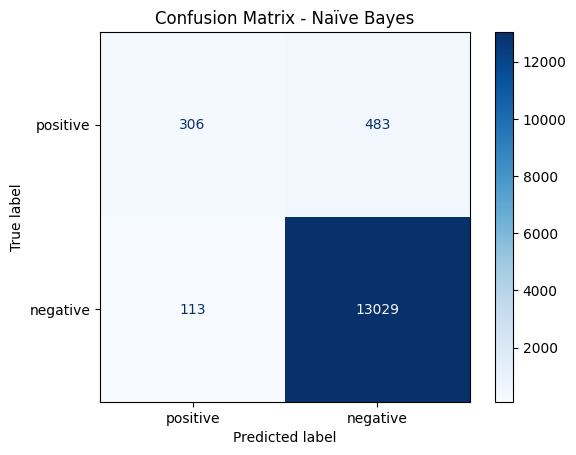

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay

labels = ['positive', 'negative']

ConfusionMatrixDisplay.from_estimator(
    estimator=nb_model,
    X=X_test_tfidf,
    y=y_test,
    display_labels=labels,
    cmap='Blues',
    xticks_rotation='horizontal'
)
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()

<ipython-input-94-469ba6f8178e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


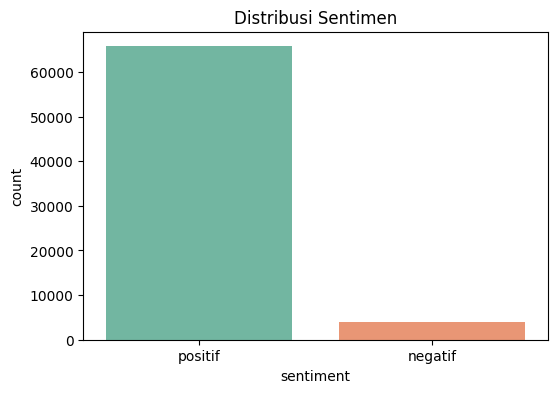

In [94]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title("Distribusi Sentimen")
plt.show()

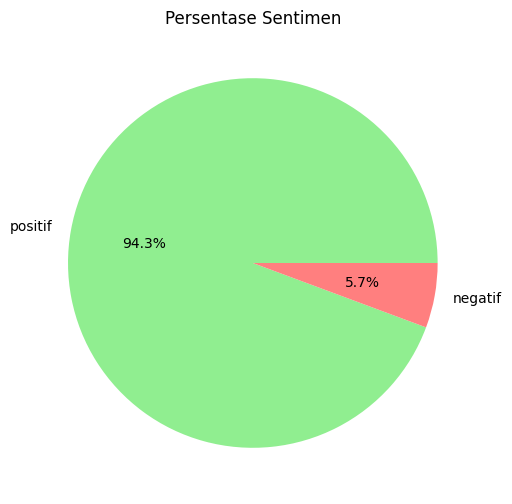

In [95]:
plt.figure(figsize=(6,6))
df["sentiment"].value_counts().plot.pie(autopct='%1.1f%%', colors=["#90ee90", "#ff7f7f"])
plt.title("Persentase Sentimen")
plt.ylabel("")
plt.show()

In [106]:
# Visualisasi Word Cloud
# Gabungkan token menjadi string untuk masing-masing sentimen
positive_text = ' '.join([' '.join(tokens) for tokens in df[df['sentiment'] == 'positif']['stemmed']])
negative_text = ' '.join([' '.join(tokens) for tokens in df[df['sentiment'] == 'negatif']['stemmed']])

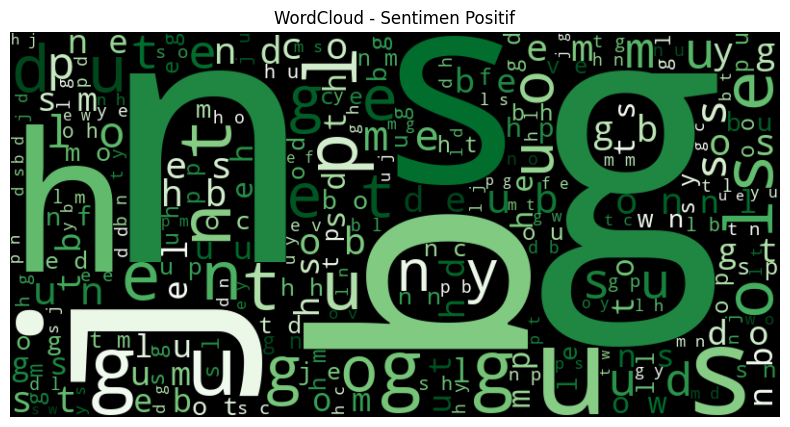

In [107]:
# Membuat WordCloud untuk sentimen positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='black', colormap='Greens').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Sentimen Positif')
plt.show()

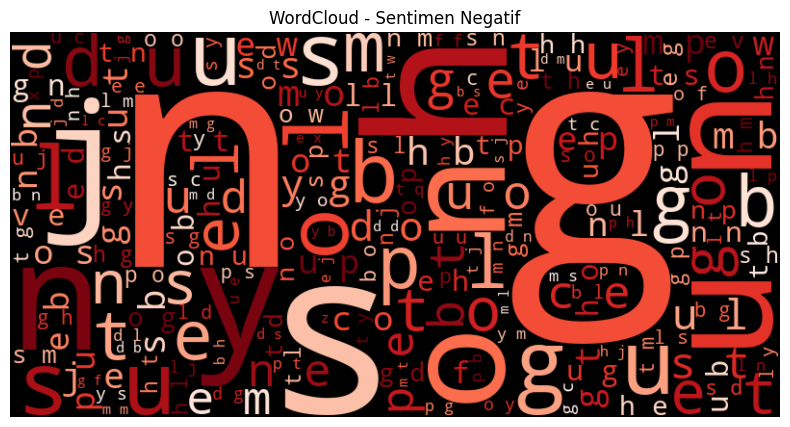

In [108]:
# Membuat WordCloud untuk sentimen negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Sentimen Negatif')
plt.show()